The following groups of cells is an adaptation from the quick-start guide provided by the Competition Organizers for a 
quick initial EDA and to set a benchmark.

Reference: https://www.kaggle.com/skleinfeld/getting-started-with-the-donorschoose-data-set/notebook

# About the DonorsChoose Data Set

The goal of the DonorsChoose competition is to build a model that can accurately predict whether a teacher's project proposal was accepted, based on the data they provided in their application. The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description | Data Type
----------|---------------|------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   | string
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> | string
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  | string
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  | string
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`| string
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> | string
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> | string
**`project_essay_1`**    | First paragraph of application essay.<sup>*</sup>  | string
**`project_essay_2`**    | Second paragraph of application essay.<sup>*</sup> | string
**`project_essay_3`**    | Third paragraph of application essay.<sup>*</sup> | string
**`project_essay_4`**    | Fourth paragraph of application essay.<sup>*</sup> | string
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   | int64
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  | string
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  | string
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` | int64

<sup>\*</sup> See **A Note on Essay Data** for some important details about changes to the application essay prompts in February 2010 that affect the values of `project_essay_1`, `project_essay_2`, `project_essay_3`, and `project_essay_4`.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description | Data Type
----------|---------------|------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   | string
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   | string
**`quantity`** | Quantity of the resource required. **Example:** `3`   | string
**`price`** | Price of the resource required. **Example:** `9.95`   | string

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description | Data Type
----------|---------------|------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved. | int64

### A Note on Essay Data

Prior to February 18th, 2010, for their DonorsChoose application, teachers had the option of writing either a free-form essay (split into `project_essay_1`, `project_essay_2`, `project_essay_3`, and `project_essay_4`) or writing free-form answers to the following four prompts:

1. Introduce your classroom (`project_essay_1`)
2. Describe the situation (`project_essay_2`)
3. Describe the solution (`project_essay_3`)
4. Empower your donors (`project_essay_4`) 

Effective February 18th, 2010, the option to write a free-form essay was removed, and all teachers were required to respond to the following four prompts:

1. Open with the challenge facing your students (`project_essay_1`)
2. Tell us more about your students (`project_essay_2`)
3. Inspire your potential donors with an overview of the resources you're requesting (`project_essay_3`)
4. Close by sharing why your project is so important (`project_essay_4`) 

When using essay data from `project_essay_1`, `project_essay_2`, `project_essay_3`, and `project_essay_4`, make sure to take into account that the nature of the text content in these fields is different for examples with a `project_submitted_datetime` prior to February 18th, 2010.

## Explore the DonorsChoose Data

Let's explore our data using [pandas](https://pandas.pydata.org/), an open source Python data analysis library. (For more practice using pandas, see the  [Quick Introduction to pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) workbook. We'll also import [matplotlib](https://matplotlib.org/) to do some data visualizations.

First, run the following cell to import pandas and matplotlib:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

Next, read the DonorsChoose training data into a `DataFrame`:

In [3]:
# Filepath to main training dataset.
train_file_path = 'data/train.csv'

# Read data and store in DataFrame.
train_data = pd.read_csv(train_file_path, sep=',')

List all the fields in the data set:

In [4]:
train_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

Retrieve the first three examples:

In [5]:
train_data.head(3)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1


Let's take a closer look at our one numeric feature, `teacher_number_of_previously_posted_projects`. Print some key stats using the  `describe()` method:

In [6]:
# Describe data set and retrieve data for teacher_number_of_previously_posted_projects
train_data.describe()["teacher_number_of_previously_posted_projects"]

count    182080.000000
mean         11.237055
std          28.016086
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max         451.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

We can see that the minumum number of previously posted projects for a teacher is 0, the maximum number is 451, and the mean (average) number is 11.23. Let's visualize the distribution using a histogram, to get a better sense of the spread.

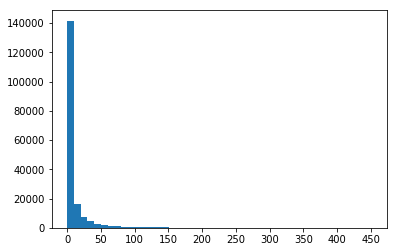

In [7]:
# Plot histogram with 45 bins; each bin representing a range of 10
plt.hist(train_data["teacher_number_of_previously_posted_projects"], bins=45)
plt.xticks(range(0, 500, 50))
plt.show()

We can see that the vast majority of examples have a `teacher_number_previously_posted_projects` value between 0 and 10, with a sharp dropoff thereafter. However, if we rebucket our data into two bins (&lt; 10 and &ge; 10), we can see that there's a substantial long tail of examples with previously-posted-project values greater than 10:

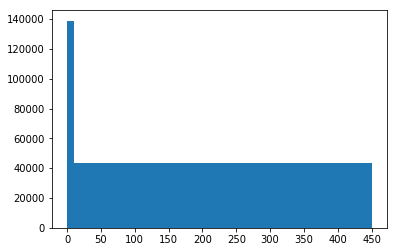

In [8]:
# Plot histogram with 45 bins; each bin representing a range of 10
plt.hist(train_data["teacher_number_of_previously_posted_projects"], bins=[0, 10, 450])
plt.xticks(range(0, 500, 50))
plt.show()

## Build an Initial Linear Classification Model (Benchmark)

Perhaps `teacher_number_of_previously_posted_projects` might provide a good signal as to whether a DonorsChoose application will be accepted? We can hypothesize that teachers who have submitted a large number of previous projects may be more familiar with the ins and outs of the application process and less likely to make errors that would lead to a rejection.

Let's test that theory by building a simple linear classification model that predicts the `project_is_approved` value solely from the `teacher_number_of_previously_posted_projects` feature. We'll build our model in TensorFlow using a `LinearClassifier` from the high-level [Estimators API](https://www.tensorflow.org/programmers_guide/estimators). 

First, import the modules we'll use, which include TensorFlow, the TensorFlow [Datasets API](https://www.tensorflow.org/get_started/datasets_quickstart), [numpy](http://www.numpy.org/), and [scikit-learn](http://scikit-learn.org/) (for some convenience functions for metrics):

In [11]:
import tensorflow as tf
from tensorflow.python.data import Dataset
import numpy as np
import sklearn.metrics as metrics

ModuleNotFoundError: No module named 'tensorflowgpu'

In [33]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))


SystemError: Bad call flags in PyCFunction_Call. METH_OLDARGS is no longer supported!

If you didn't import the DonorsChoose training data above, do so now:

In [9]:
import pandas as pd

# Filepath to main training dataset.
train_file_path = 'data/train.csv'

# Read data and store in DataFrame.
train_data = pd.read_csv(train_file_path, sep=',')

Next, define the feature (`teacher_number_of_previously_posted_projects`) and label (`project_is_approved`):

In [10]:
# Define predictor feature(s); start with a simple example with one feature.
my_feature_name = 'teacher_number_of_previously_posted_projects'
my_feature = train_data[[my_feature_name]]

# Specify the label to predict.
my_target_name = 'project_is_approved'

Then split the data into training and validation sets:

In [11]:
# Prepare training and validation sets.
N_TRAINING = 160000
N_VALIDATION = 100000

# Choose examples and targets for training.
training_examples = train_data.head(N_TRAINING)[[my_feature_name]].copy()
training_targets = train_data.head(N_TRAINING)[[my_target_name]].copy()

# Choose examples and targets for validation.
validation_examples = train_data.tail(N_VALIDATION)[[my_feature_name]].copy()
validation_targets = train_data.tail(N_VALIDATION)[[my_target_name]].copy()

Then set up the input function to feed data into the model using the [Datasets API](https://www.tensorflow.org/get_started/datasets_quickstart):

In [12]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified
    if shuffle:
      # Shuffle with a buffer size of 10000
      ds = ds.shuffle(10000)
    
    # Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

Next, construct the `LinearClassifier`:

In [13]:
# Learning rate for training.
learning_rate = 0.00001

# Function for constructing feature columns from input features
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.
  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

# Create a linear classifier object.
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
# Set a clipping ratio of 5.0
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  
linear_classifier = tf.estimator.LinearClassifier(
    feature_columns=construct_feature_columns(training_examples),
    optimizer=my_optimizer
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpoa2__lhd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff72c0114a8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Create input functions for training the model, predicting on the prediction data, and predicting on the validation data:

In [14]:
batch_size = 10

# Create input function for training
training_input_fn = lambda: my_input_fn(training_examples, 
                                        training_targets[my_target_name],
                                        batch_size=batch_size)

# Create input function for predicting on training data
predict_training_input_fn = lambda: my_input_fn(training_examples,
                                                training_targets[my_target_name],
                                                num_epochs=1, 
                                                shuffle=False)

# Create input function for predicting on validation data
predict_validation_input_fn = lambda: my_input_fn(validation_examples,
                                                  validation_targets[my_target_name],
                                                  num_epochs=1, 
                                                  shuffle=False)

Finally, train the model. This may take a few minutes. When training is complete, the training and validation log losses will be output:

In [ ]:
# Train for 200 steps
linear_classifier.train(
  input_fn=training_input_fn,
  steps=200
)

# Compute predictions.    
training_probabilities = linear_classifier.predict(
    input_fn=predict_training_input_fn)
training_probabilities = np.array(
      [item['probabilities'] for item in training_probabilities])
    
validation_probabilities = linear_classifier.predict(
    input_fn=predict_validation_input_fn)
validation_probabilities = np.array(
    [item['probabilities'] for item in validation_probabilities])
    
training_log_loss = metrics.log_loss(
    training_targets, training_probabilities)
validation_log_loss = metrics.log_loss(
    validation_targets, validation_probabilities)
  
# Print the training and validation log loss.
print("Training Loss: %0.2f" % training_log_loss)
print("Validation Loss: %0.2f" % validation_log_loss)

auc = metrics.auc

Next, let's calculate the [AUC (area under the curve)](https://developers.google.com/machine-learning/glossary#AUC), which is the metric this competition uses to assess the accuracy of prediction. This may take a few minutes. When calculation is complete, the training and validation AUC values will be output:

In [ ]:
training_metrics = linear_classifier.evaluate(input_fn=predict_training_input_fn)
validation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the training set: %0.2f" % training_metrics['auc'])
print("AUC on the validation set: %0.2f" % validation_metrics['auc'])

We've achieved AUC values of 0.56, which is slightly better than random. This is a good start, but can you improve the model to achieve better results?

## What to Try Next

A couple ideas for model refinements you can try to see if you can improve model accuracy:

* Try adjusting the `learning_rate` and `steps` hyperparameters on the existing model.
* Try adding some text features to the model, such as the content of the project essays (`project_essay_1`, `project_essay_2`, `project_essay_3`, `project_essay_4`). You may want to try building a vocabulary from these strings; see the Machine Learning Crash Course [Intro to Sparse Data and Embeddings exercise](https://colab.research.google.com/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb) for some practice on working with text data and vocabularies.  

## Submitting a Kaggle Entry

Once you're satisfied with your model performance, you can make predictions on the test set as follows (this may take a few minutes to run):

In [ ]:
# Filepath to main test dataset.
test_file_path = '../input/test.csv'

# Read data and store in DataFrame.
test_data = pd.read_csv(test_file_path, sep=',')

my_feature_name = 'teacher_number_of_previously_posted_projects'

# Get test features
test_examples = test_data[[my_feature_name]].copy()

# No labels in data set, so generate some placeholder values
placeholder_label_vals = [0 for i in range(0, 78035)]
test_labels = pd.DataFrame({"project_is_approved": placeholder_label_vals})

predict_test_input_fn = lambda: my_input_fn(test_examples,
                                            test_labels, # unused for prediction
                                            num_epochs=1, 
                                            shuffle=False)

# Make predictions
predictions_generator = linear_classifier.predict(input_fn=predict_test_input_fn)
predictions_list = list(predictions_generator)

# Extract probabilities
probabilities = [p["probabilities"][1] for p in predictions_list]
print("Done extracting probabilities")

We want to format our submission as a CSV with two fields for each example: `id` and our prediction for `project_is_approved`, e.g.:

```
id,project_is_approved
p233245,0.54
p096795,0.14
p236235,0.94
```

Run the following code to create a `DataFrame` in the required format:

In [ ]:
my_submission = pd.DataFrame({'id': test_data["id"], 'project_is_approved': probabilities})
print(my_submission.values)

Then write your output to CSV:

In [ ]:
my_submission.to_csv('my_submission.csv', index=False)

Next, click the **Commit & Run** button to execute the entire Kaggle kernel. This will take ~10 minutes to run. 

When it's finished, you'll see the navigation bar at the top of your screen has an **Output** tab. Click on the **Output** tab, and click on the **Submit to Competition** button to submit to Kaggle.